In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("q2/data/spambase.data", header=None)

In [2]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [3]:
df[df[57] == 1].shape

(1813, 58)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42)

In [5]:
parameters = {'max_depth':[1, 20]}
tree = DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(tree, parameters, cv=5)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [1, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, v

In [6]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [7]:
clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [8]:
from sklearn.metrics import classification_report

parameters = {'max_depth':[x for x in range(1,20)]}
tree = DecisionTreeClassifier(random_state=0)
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(tree, parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'max_depth': 8}

Grid scores on development set:

0.826 (+/-0.037) for {'max_depth': 1}
0.884 (+/-0.028) for {'max_depth': 2}
0.874 (+/-0.020) for {'max_depth': 3}
0.911 (+/-0.020) for {'max_depth': 4}
0.909 (+/-0.015) for {'max_depth': 5}
0.915 (+/-0.014) for {'max_depth': 6}
0.913 (+/-0.013) for {'max_depth': 7}
0.920 (+/-0.010) for {'max_depth': 8}
0.920 (+/-0.016) for {'max_depth': 9}
0.917 (+/-0.010) for {'max_depth': 10}
0.917 (+/-0.011) for {'max_depth': 11}
0.916 (+/-0.008) for {'max_depth': 12}
0.912 (+/-0.012) for {'max_depth': 13}
0.913 (+/-0.014) for {'max_depth': 14}
0.913 (+/-0.012) for {'max_depth': 15}
0.914 (+/-0.010) for {'max_depth': 16}
0.919 (+/-0.019) for {'max_depth': 17}
0.914 (+/-0.020) for {'max_depth': 18}
0.914 (+/-0.013) for {'max_depth': 19}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluatio

In [9]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(max_depth=8)
clf = clf.fit(x_train, y_train)

tree.export_graphviz(clf,out_file="q2/data/tree.dot") 

y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9218241042345277

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0)



parameters = {'max_depth':[x for x in range(1,20)], "n_estimators":[x for x in range(20,50)]}
tree = RandomForestClassifier()
scores = ["accuracy"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(tree, parameters, cv=5,
                       scoring=score)
    clf.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'max_depth': 16, 'n_estimators': 24}

Grid scores on development set:

0.836 (+/-0.022) for {'max_depth': 1, 'n_estimators': 20}
0.836 (+/-0.025) for {'max_depth': 1, 'n_estimators': 21}
0.836 (+/-0.027) for {'max_depth': 1, 'n_estimators': 22}
0.837 (+/-0.026) for {'max_depth': 1, 'n_estimators': 23}
0.829 (+/-0.036) for {'max_depth': 1, 'n_estimators': 24}
0.839 (+/-0.028) for {'max_depth': 1, 'n_estimators': 25}
0.835 (+/-0.014) for {'max_depth': 1, 'n_estimators': 26}
0.836 (+/-0.034) for {'max_depth': 1, 'n_estimators': 27}
0.823 (+/-0.043) for {'max_depth': 1, 'n_estimators': 28}
0.838 (+/-0.022) for {'max_depth': 1, 'n_estimators': 29}
0.832 (+/-0.036) for {'max_depth': 1, 'n_estimators': 30}
0.826 (+/-0.034) for {'max_depth': 1, 'n_estimators': 31}
0.836 (+/-0.021) for {'max_depth': 1, 'n_estimators': 32}
0.838 (+/-0.011) for {'max_depth': 1, 'n_estimators': 33}
0.836 (+/-0.037) for {'max_de

In [11]:
import numpy as np
import random
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

#todo split datause for confusion matrix
def rand_search(clf, param_dist, x, y, cv=5, n_iter_search=20):
    x, x_test, y, y_test = train_test_split(x, y, test_size=0.05, random_state=42)
    
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=cv, iid=False)
    start = time()
    random_search.fit(x, y)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(random_search.cv_results_)
    results = random_search.cv_results_
    y_pred = random_search.predict(x_test)
    cm = confusion_matrix(list(y_test), list(y_pred))
    return {"results":results,"confusion_matrix":cm}



In [12]:
clf = RandomForestClassifier()



parameters = {'max_depth':[x for x in range(1,20)], "n_estimators":[x for x in range(20,500)]}

rand_search(clf, parameters, x_train, y_train, cv=5, n_iter_search=20)

RandomizedSearchCV took 52.22 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.947 (std: 0.005)
Parameters: {'n_estimators': 281, 'max_depth': 16}

Model with rank: 2
Mean validation score: 0.945 (std: 0.005)
Parameters: {'n_estimators': 441, 'max_depth': 16}

Model with rank: 3
Mean validation score: 0.944 (std: 0.005)
Parameters: {'n_estimators': 378, 'max_depth': 17}



{'results': {'mean_fit_time': array([1.06493082, 0.51341186, 0.12554998, 0.90354033, 0.06358008,
         0.59177485, 0.23530426, 0.69409361, 0.41351504, 0.26682172,
         0.06450353, 0.76564536, 0.32394958, 0.73761783, 0.43688974,
         0.66846876, 1.04148059, 0.06382146, 0.48061967, 0.36404533]),
  'std_fit_time': array([0.03724439, 0.01265646, 0.00121472, 0.00592789, 0.00034002,
         0.00698366, 0.00388655, 0.00731019, 0.00373979, 0.00244825,
         0.00040072, 0.00592113, 0.00494791, 0.00705625, 0.00469793,
         0.0145297 , 0.01025997, 0.00015987, 0.00294437, 0.00260041]),
  'mean_score_time': array([0.04360499, 0.02129259, 0.00765605, 0.03657403, 0.00380445,
         0.02715893, 0.01026287, 0.02889004, 0.01897469, 0.022821  ,
         0.0052814 , 0.0348031 , 0.02077703, 0.03156676, 0.03093786,
         0.02749147, 0.04235997, 0.00436554, 0.0202343 , 0.01524687]),
  'std_score_time': array([2.66125831e-03, 2.15809808e-04, 1.02177914e-04, 2.93089564e-04,
         2.5

In [13]:
from sklearn.metrics import roc_auc_score

tree = DecisionTreeClassifier(random_state=0, max_depth = 8).fit(x_train, y_train)
y_pred = tree.predict(x_test)

auc_tree = roc_auc_score(y_test, y_pred)
print(auc_tree)


r_tree = RandomForestClassifier(random_state=0, max_depth = 17, n_estimators=121).fit(x_train, y_train)
y_pred = r_tree.predict(x_test)

auc_tree = roc_auc_score(y_test, y_pred)
print(auc_tree)


0.9109952194697958
0.9486165435317977


In [14]:
auc= []

for i in range (1,301):
    r_tree = RandomForestClassifier(random_state=0, max_depth = 10, n_estimators=i).fit(x_train, y_train)
    y_pred = r_tree.predict(x_test)
    auc_tree = roc_auc_score(y_test, y_pred)
    auc.append(auc_tree)
    


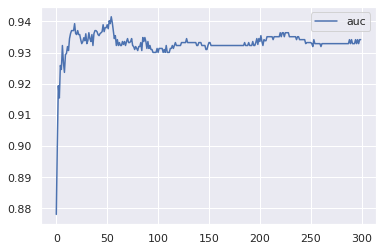

In [15]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(auc, columns =['auc'])

ax = sns.lineplot( data=df)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


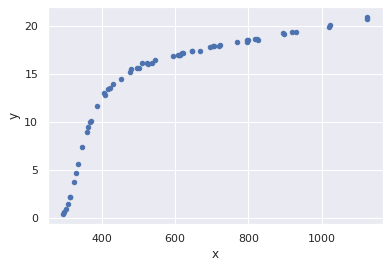

In [16]:
df = pd.DataFrame(pd.read_csv("q3/copper-new.txt", header = None))
df['x'] = df.apply(lambda x: list(filter(None,x[0].split(' ')))[1], axis=1)
df['y'] = df.apply(lambda x: list(filter(None,x[0].split(' ')))[0], axis=1)
df= df[['x','y']].astype(float)
df["x"] = df["x"] + 273.15
df.head()
df.plot.scatter(x='x',y='y')

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
x= df.iloc[:,0].values.reshape(df.shape[0],1)
y = df.iloc[:,1].values.reshape(df.shape[0],1)

reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)
mse = np.round(mean_squared_error(y, y_pred),3 )
coef = np.round(reg.coef_[0][0],5)
intercept = np.round(reg.intercept_[0],5)
r_squared = np.round(reg.score(x, y), 3)
print(f"MSE is: {mse}" )
print(f"Coeffient is: {coef}")
print(f"Intercept is: {intercept}")
print(f"R^2 is: {r_squared}")


MSE is: 10.521
Coeffient is: 0.02128
Intercept is: 1.57064
R^2 is: 0.686


In [18]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def run_ridge(x,y,degree,alpha=.5):

    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    model.fit(x, y)
    y_pred = model.predict(x)
    mse = np.round(mean_squared_error(y, y_pred),3 )
    r_squared = np.round(model.score(x, y),3)
    print(f"Degree is: {degree}" )
    print(f"MSE is: {mse}" )
    print(f"Coeffient is: {coef}")
    print(f"Intercept is: {intercept}")
    print(f"R^2 is: {r_squared}")
    print("\n")
    return {"degree":degree, "mse":mse, "R^2":r_squared}
    
scores = []
for i in range(1,11):
    s = run_ridge(x,y,i,alpha=.5)
    scores.append(s)

Degree is: 1
MSE is: 10.521
Coeffient is: 0.02128
Intercept is: 1.57064
R^2 is: 0.686


Degree is: 2
MSE is: 4.093
Coeffient is: 0.02128
Intercept is: 1.57064
R^2 is: 0.878


Degree is: 3
MSE is: 1.085
Coeffient is: 0.02128
Intercept is: 1.57064
R^2 is: 0.968


Degree is: 4
MSE is: 0.22
Coeffient is: 0.02128
Intercept is: 1.57064
R^2 is: 0.993


Degree is: 5
MSE is: 0.069
Coeffient is: 0.02128
Intercept is: 1.57064
R^2 is: 0.998


Degree is: 6
MSE is: 0.072
Coeffient is: 0.02128
Intercept is: 1.57064
R^2 is: 0.998


Degree is: 7
MSE is: 0.058
Coeffient is: 0.02128
Intercept is: 1.57064
R^2 is: 0.998


Degree is: 8
MSE is: 0.057
Coeffient is: 0.02128
Intercept is: 1.57064
R^2 is: 0.998


Degree is: 9
MSE is: 0.042
Coeffient is: 0.02128
Intercept is: 1.57064
R^2 is: 0.999


Degree is: 10
MSE is: 0.027
Coeffient is: 0.02128
Intercept is: 1.57064
R^2 is: 0.999




In [19]:
print(pd.DataFrame(scores)[['degree','R^2', 'mse']].to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  degree &    R\textasciicircum 2 &     mse \\
\midrule
0 &       1 &  0.686 &  10.521 \\
1 &       2 &  0.878 &   4.093 \\
2 &       3 &  0.968 &   1.085 \\
3 &       4 &  0.993 &   0.220 \\
4 &       5 &  0.998 &   0.069 \\
5 &       6 &  0.998 &   0.072 \\
6 &       7 &  0.998 &   0.058 \\
7 &       8 &  0.998 &   0.057 \\
8 &       9 &  0.999 &   0.042 \\
9 &      10 &  0.999 &   0.027 \\
\bottomrule
\end{tabular}



In [27]:
from sklearn.linear_model import RidgeCV
alphas = np.arange(0.01,200,.01)
poly = PolynomialFeatures(degree=5)
X_ = poly.fit_transform(x)
model = RidgeCV(alphas=alphas, cv=None,store_cv_values=True)
model.fit(X_,y)
scores = model.cv_values_

In [28]:
model.alpha_

0.72

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


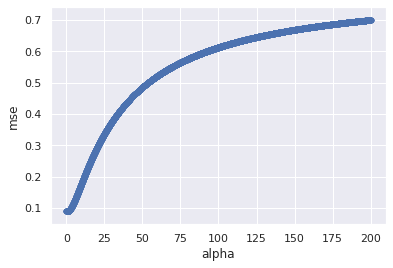

In [29]:
cv = pd.DataFrame(scores.mean(axis=1).T.mean(axis=1))

cv['alpha'] = alphas
cv.columns = ['mse','alpha']

cv.plot.scatter(x='alpha', y='mse')

In [30]:
p = []

for i in range(1,11):
    poly = PolynomialFeatures(degree=i)
    X_ = poly.fit_transform(x)
    model = RidgeCV(alphas=alphas, cv=None,store_cv_values=True)
    model.fit(X_,y)
    scores = model.cv_values_
    cv = pd.DataFrame(scores.mean(axis=1).T.mean(axis=1))
    cv['alpha'] = alphas
    cv.columns = ['mse','alpha']
    mse_min = cv["mse"].min()
    p.append({"degree":float(i),"log(mse)":np.log(mse_min)})
    cv['alpha'] = alphas
    cv.columns = ['mse','alpha']
    print(f"\nDegree: {i}\n")
    print(cv[cv["mse"] == mse_min])


Degree: 1

             mse   alpha
19998  11.487401  199.99

Degree: 2

            mse   alpha
19998  4.814306  199.99

Degree: 3

            mse   alpha
19998  1.310141  199.99

Degree: 4

          mse  alpha
961  0.273212   9.62

Degree: 5

         mse  alpha
71  0.089848   0.72

Degree: 6

            mse   alpha
19998  0.170193  199.99

Degree: 7

            mse   alpha
19998  2.583757  199.99

Degree: 8

               mse   alpha
19998  3478.709812  199.99

Degree: 9

                 mse   alpha
19997  809576.964079  199.98

Degree: 10

               mse   alpha
19998  6082.576367  199.99


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


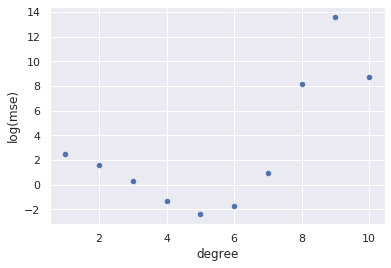

In [31]:
pd.DataFrame(p).plot.scatter(x="degree", y = "log(mse)")

In [32]:
model_1 = LinearRegression().fit(x, y)
model_2 = make_pipeline(PolynomialFeatures(5), Ridge(alpha=.85)).fit(x, y)

In [33]:
test = np.array([400]).reshape(1,-1)
m1 = np.round(model_1.predict(test)[0][0],2)
m2 = np.round(model_2.predict(test)[0][0],2)

In [34]:
tbl = pd.DataFrame({"Model 1":[m1], "Model 2":[m2]})
print(tbl.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Model 1 &  Model 2 \\
\midrule
0 &    10.08 &    12.12 \\
\bottomrule
\end{tabular}



In [35]:
intrp = np.interp([400], list(x.reshape(x.shape[0])), list(y.reshape(y.shape[0])))

In [36]:
intrp

array([12.49662532])

In [37]:
m2 - intrp

array([-0.37662532])

In [38]:
m1-intrp

array([-2.41662532])